# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
import json
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# Bitcoin and Ethereum variables, respectively 

my_btc = 1.2
my_eth = 5.3 

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Test cell to view responses and verify data,etc 
# use requests lib and set the data as a json 
responsebtc = requests.get(btc_url)
btcdata = responsebtc.json()
btc_pricetest = btcdata['data']['1']['quotes']['USD']['price']
btc_pricetest
# Fetch current ETH price

responseeth = requests.get(eth_url)
ethdata = responseeth.json()
eth_pricetest = ethdata['data']['1027']['quotes']['USD']['price']
eth_pricetest

# View it so I know what I am looking for to pull out the price. 
# BTC Test 
# print(json.dumps(btcdata, indent=4))
print(f'BTC Price: {btc_pricetest}')


# ETH Test
# print(json.dumps(ethdata, indent=4))
print(f'ETH Price {eth_pricetest}')



BTC Price: 33970.0
ETH Price 1077.27


In [6]:
# Fetch current BTC price
# YOUR CODE HERE!
responsebtc = requests.get(btc_url)
btcdata = responsebtc.json()
btc_price = btcdata['data']['1']['quotes']['USD']['price']
btc_price
# Fetch current ETH price
# YOUR CODE HERE!]
responseeth = requests.get(eth_url)
ethdata = responseeth.json()
eth_price = ethdata['data']['1027']['quotes']['USD']['price']
eth_price
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = (my_btc * btc_price)
my_eth_value = (my_eth * eth_price)


# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $40764.00
The current value of your 5.3 ETH is $5709.53


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Current amount of shares
# YOUR CODE HERE!

my_agg = 200 
my_spy = 50 


In [8]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Testing.. 
# type(alpaca_api_key)
# type(alpaca_secret_key)

In [9]:
# Create the Alpaca API object
# YOUR CODE HERE!

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [10]:
# Format current date as ISO format
# YOUR CODE HERE!

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get data for both stocks 

# Set start and end datetimes for today
start_date = pd.Timestamp("2020-12-30", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-12-30", tz="America/New_York").isoformat()

todaysdata = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df


# Preview DataFrame
todaysdata.head()

AGG                                       SPY  \
                             open    high       low  close   volume    open   
time                                                                          
2020-12-30 00:00:00-05:00  118.09  118.12  117.9815  118.1  2593714  372.34   

                                                            
                            high     low   close    volume  
time                                                        
2020-12-30 00:00:00-05:00  373.1  371.57  371.93  40295732

In [11]:
# Set new DF and get closing prices 
closingprice = pd.DataFrame()

for ticker in tickers:
    closingprice[ticker] = todaysdata[ticker]['close']

# Drop the time component of the date
closingprice.index = closingprice.index.date

# show it
closingprice.head()


AGG     SPY
2020-12-30  118.1  371.93

In [12]:
# Pick AGG and SPY close prices
agg_close_price = closingprice.iloc[0][0]
spy_close_price = closingprice.iloc[0][1]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.1
Current SPY closing price: $371.93


In [13]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = (my_agg * agg_close_price)
my_spy_value = (my_spy * spy_close_price)

# Print current value of share
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")

The current value of your 200 AGG shares is $23620.00
The current value of your 50 SPY shares is $18596.50


### Savings Health Analysis

In [14]:
# Set combined values: 
cryptoval = my_btc_value + my_eth_value 
sharesval = my_agg_value + my_spy_value

print(f'total crypto = {cryptoval} and total shares = {sharesval}')

total crypto = 46473.531 and total shares = 42216.5


In [15]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame

data = {'amount' : [cryptoval, sharesval]} 
df_savings = pd.DataFrame(data=data, index=['crypto', 'shares'])


# Display savings DataFrame
display(df_savings)

amount
crypto  46473.531
shares  42216.500

In [16]:
# Plot savings pie chart
df_savings.plot.pie(subplots=True)

array([<AxesSubplot:ylabel='amount'>], dtype=object)

In [17]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# Do the maths and if statements 
total_savings = (cryptoval + sharesval)
# print(total_savings)
# print(emergency_fund)


if total_savings > emergency_fund : 
    print("Congrats, you have enough money for emergencies")
elif total_savings == emergency_fund:
    print("You have finally saved enough for an emergency. Great work")
elif total_savings < emergency_fund: 
    amt_remaining = emergency_fund - total_savings
    print(f'${amt_remaining} left to save for an emergency')


Congrats, you have enough money for emergencies


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [18]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-12-20', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-12-20', tz='America/New_York').isoformat()

In [19]:
# Get 5 years' worth of historical data for SPY and AGG

df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df



# Display sample data
df_stock_data.head()

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2015-12-21 00:00:00-05:00  108.49  108.54  108.24  108.29  2713944  201.43   
2015-12-22 00:00:00-05:00  108.27  108.28  108.12  108.19  4323053  202.72   
2015-12-23 00:00:00-05:00  108.01  108.19  108.00  108.18  3399409  204.71   
2015-12-24 00:00:00-05:00  107.95  108.05  107.92  108.01  1151867  205.72   
2015-12-28 00:00:00-05:00  108.03  108.13  107.99  108.02  2446828  204.86   

                                                             
                             high     low   close    volume  
time                                                         
2015-12-21 00:00:00-05:00  201.88  200.09  201.65  80958257  
2015-12-22 00:00:00-05:00  203.85  201.55  203.51  84529093  
2015-12-23 00:00:00-05:00  206.07  204.58  206.02  79877884  
2015-12-24 00:00:00-05:00  206.33  205.42  205.57  31975061  
2015-12-28 00:00:00-05:00  205.26  203.94  205.19  50363129

In [20]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

MC_Retirement = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [21]:
# Printing the simulation input data
MC_Retirement.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
time                                                                 
2015-12-21 00:00:00-05:00  108.49  108.54  108.24  108.29  2713944   
2015-12-22 00:00:00-05:00  108.27  108.28  108.12  108.19  4323053   
2015-12-23 00:00:00-05:00  108.01  108.19  108.00  108.18  3399409   
2015-12-24 00:00:00-05:00  107.95  108.05  107.92  108.01  1151867   
2015-12-28 00:00:00-05:00  108.03  108.13  107.99  108.02  2446828   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-12-21 00:00:00-05:00          NaN  201.43  201.88  200.09  201.65   
2015-12-22 00:00:00-05:00    -0.000923  202.72  203.85  201.55  203.51   
2015-12-23 00:00:00-05:00    -0.000092  204.71  206.07  204.58  206.02   
2015-12-24 00:00:00-05:00    -0.001571  205.72  206.33  205.42  205.57   
2015-12-28 00:00:00-05:00     0.000093  204.86  205.26  203.94  205.19   

                                                  
                             volume daily_return  
time                                              
2015-12-21 00:00:00-05:00  80958257          NaN  
2015-12-22 00:00:00-05:00  84529093     0.009224  
2015-12-23 00:00:00-05:00  79877884     0.012334  
2015-12-24 00:00:00-05:00  31975061    -0.002184  
2015-12-28 00:00:00-05:00  50363129    -0.001849

In [22]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_Retirement.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0          1          2          3          4         5    \
0      1.000000   1.000000   1.000000   1.000000   1.000000  1.000000   
1      1.006724   0.992730   0.989550   0.993710   0.985303  0.987087   
2      1.011551   0.996572   0.993574   0.987211   0.988235  1.005576   
3      1.013663   1.000143   0.993670   0.992864   0.988885  1.011180   
4      1.013781   0.988744   0.987691   1.012761   0.997880  1.004755   
...         ...        ...        ...        ...        ...       ...   
7556  12.010618  19.079572  32.819173  13.875685  12.600094  5.615001   
7557  12.048157  19.060113  32.771195  14.020910  12.547869  5.492793   
7558  12.103992  18.848330  32.545602  13.921580  12.540880  5.426490   
7559  12.214061  19.016707  32.726784  14.086780  12.727426  5.398456   
7560  12.265822  19.050324  33.184426  14.074706  12.891724  5.444782   

            6          7         8         9    ...       490        491  \
0      1.000000   1.000000  1.000000  1.000000  ...  1.000000   1.000000   
1      0.998077   1.000403  1.004387  0.998191  ...  0.999201   0.987128   
2      1.003705   0.985253  0.995826  1.004628  ...  0.991090   0.994829   
3      1.005114   0.991238  0.988513  1.012257  ...  0.984634   1.009394   
4      1.004851   0.994717  0.990824  1.014069  ...  0.996321   1.011467   
...         ...        ...       ...       ...  ...       ...        ...   
7556  12.232403  19.214362  6.876037  9.470055  ...  4.500856  17.427225   
7557  12.248939  19.382544  6.890527  9.416281  ...  4.493657  17.418175   
7558  12.164248  19.552998  6.874203  9.507236  ...  4.504563  17.389624   
7559  12.296569  19.546018  6.930951  9.421809  ...  4.496114  17.240121   
7560  12.297106  19.449615  6.960206  9.343216  ...  4.467382  17.213441   

            492        493        494        495        496        497  \
0      1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   
1      1.007903   0.993328   0.988693   0.984425   0.990697   1.005833   
2      1.008225   1.000720   0.985305   0.989168   0.992636   0.996073   
3      1.017196   0.998231   0.973679   1.008289   0.991808   1.013672   
4      1.025091   0.990042   0.985525   1.007213   0.996249   1.026409   
...         ...        ...        ...        ...        ...        ...   
7556  13.889306   9.971631  10.695556  10.942969  17.842527  10.072152   
7557  14.012777  10.060875  10.537483  10.904640  17.865440  10.029943   
7558  14.043426  10.129770  10.500445  10.928426  17.851684   9.887456   
7559  14.037318  10.044364  10.513473  10.904067  17.791344   9.943590   
7560  13.884599  10.035485  10.435097  10.780054  17.672815   9.750540   

            498        499  
0      1.000000   1.000000  
1      0.997021   0.995229  
2      0.987266   0.992903  
3      0.990407   0.983400  
4      0.993133   0.981684  
...         ...        ...  
7556  19.136127  10.875967  
7557  19.067889  10.918314  
7558  19.089686  10.969101  
7559  19.053375  10.989260  
7560  19.197565  10.905136  

[7561 rows x 500 columns]

In [23]:
# Plot simulation outcomes
line_plot = MC_Retirement.plot_simulation()

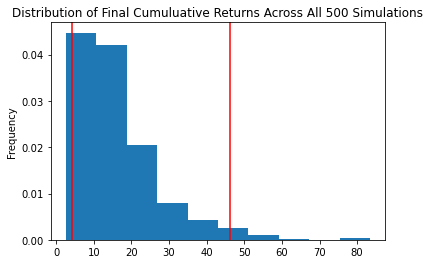

In [24]:
# Plot probability distribution and confidence intervals
dist_plot = MC_Retirement.plot_distribution()

### Retirement Analysis

In [25]:
# Fetch summary statistics from the Monte Carlo simulation results
stats_tbl = MC_Retirement.summarize_cumulative_return()

# Print summary statistics
print(stats_tbl)

count           500.000000
mean             16.144572
std              10.918279
min               2.549546
25%               8.794076
50%              13.148392
75%              20.235451
max              83.459914
95% CI Lower      4.161718
95% CI Upper     46.322988
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [26]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(stats_tbl[8]*initial_investment,2)
ci_upper = round(stats_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $83234.36 and $926459.76


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [27]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(stats_tbl[8]*initial_investment,2)
ci_upper = round(stats_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $124851.55 and $1389689.64


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [117]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns

fiveMC_Retirement = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.30, .70],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [118]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# MC_Retirement.portfolio_data.head()
fiveMC_Retirement.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.999569  1.007187  1.002736  0.991158  1.003960  0.995346  0.998200   
2     0.993806  1.003563  1.001419  0.989911  1.012092  0.995729  0.998455   
3     1.000823  1.002184  1.002017  0.989418  1.007562  0.992151  1.000727   
4     1.023418  0.980930  1.011355  1.013396  1.000515  0.995215  1.002768   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.725822  1.209371  1.474264  1.642714  1.469983  1.345009  1.453721   
1257  1.775556  1.208617  1.479093  1.632973  1.481295  1.338156  1.459634   
1258  1.768131  1.226574  1.484379  1.610984  1.479841  1.322434  1.455470   
1259  1.778816  1.218876  1.483314  1.614538  1.486233  1.322540  1.445531   
1260  1.768787  1.216235  1.478199  1.626009  1.473825  1.320704  1.450721   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.002037  0.994515  0.992145  ...  1.016226  0.996760  0.999281   
2     0.992463  1.005946  1.008648  ...  1.015465  1.002371  1.004988   
3     0.999193  1.001219  1.011916  ...  1.012755  1.015002  1.005070   
4     0.986298  1.004989  1.004208  ...  1.027478  1.028509  1.011660   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.016327  1.123261  1.414013  ...  1.627510  1.960960  1.422566   
1257  1.010886  1.125502  1.445310  ...  1.604489  1.963919  1.416586   
1258  0.999812  1.129537  1.437293  ...  1.574297  1.937101  1.419075   
1259  1.010325  1.121924  1.449381  ...  1.592770  1.937535  1.419189   
1260  1.008409  1.127279  1.459866  ...  1.577212  1.924809  1.432939   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.031588  0.992313  0.988157  1.000180  1.010688  1.009085  0.996095  
2     1.030807  0.971483  0.996842  1.008470  1.021206  0.996988  1.001658  
3     1.016513  0.971294  0.989353  1.005950  1.013594  0.981894  0.993986  
4     1.021884  0.960985  0.998006  0.992621  1.018311  0.975261  0.981998  
...        ...       ...       ...       ...       ...       ...       ...  
1256  2.932077  2.195602  1.289764  2.795584  1.593869  1.417798  1.353703  
1257  2.914854  2.152770  1.284411  2.830614  1.599310  1.409432  1.363242  
1258  2.922808  2.154343  1.291984  2.823940  1.604797  1.399507  1.371677  
1259  2.950879  2.166900  1.309386  2.841341  1.612099  1.389465  1.370092  
1260  2.869685  2.184791  1.313851  2.857665  1.583069  1.390157  1.355107  

[1261 rows x 500 columns]

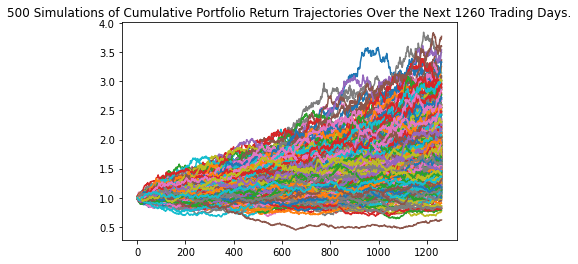

In [119]:
# Plot simulation outcomes
fiverline_plot = fiveMC_Retirement.plot_simulation()

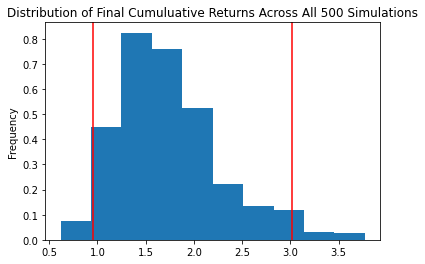

In [120]:
# Plot probability distribution and confidence intervals
fiverdist_plot = fiveMC_Retirement.plot_distribution()

In [121]:
# Fetch summary statistics from the Monte Carlo simulation results
fiverstats_tbl = fiveMC_Retirement.summarize_cumulative_return()

# Print summary statistics
print(fiverstats_tbl)

count           500.000000
mean              1.734747
std               0.539344
min               0.617002
25%               1.359830
50%               1.646543
75%               2.002109
max               3.772152
95% CI Lower      0.957449
95% CI Upper      3.020623
Name: 1260, dtype: float64


In [122]:
# Set initial investment
# Didn't change from before 
fiverinitial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
fiverci_lower = round(fiverstats_tbl[8]*fiverinitial_investment,2)
fiverci_upper = round(fiverstats_tbl[9]*fiverinitial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${fiverinitial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${fiverci_lower} and ${fiverci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $19148.97 and $60412.47


### Ten Years Retirement Option

In [82]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
tenMC_Retirement = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20, .80],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [83]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
tenMC_Retirement.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.007626  0.999044  1.001219  0.993008  1.003723  0.995858  1.009313   
2     1.021131  1.010796  0.991307  1.014320  1.016868  1.007573  1.010797   
3     1.021119  0.990111  0.984732  1.000155  1.014600  1.004465  1.004074   
4     1.026289  0.978417  0.988514  0.991943  1.012146  0.999529  1.003221   
...        ...       ...       ...       ...       ...       ...       ...   
2516  3.185573  3.158018  4.462914  4.928444  6.428360  3.620743  1.593716   
2517  3.209806  3.128586  4.589094  4.857567  6.255363  3.615463  1.591811   
2518  3.258700  3.149549  4.534184  4.827993  6.227408  3.599331  1.595156   
2519  3.320585  3.210888  4.583756  4.877404  6.186179  3.601203  1.580876   
2520  3.282931  3.177432  4.599346  4.957572  6.176645  3.562858  1.574698   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.004449  0.992481  0.981338  ...  1.001729  0.993252  1.014148   
2     1.003502  1.010730  1.001757  ...  0.997911  1.008054  1.005525   
3     0.994262  1.000413  0.999460  ...  0.989741  0.996280  1.001271   
4     0.987961  0.985033  1.014235  ...  0.988592  0.989440  0.998217   
...        ...       ...       ...  ...       ...       ...       ...   
2516  2.207628  3.649516  1.568792  ...  3.202008  2.446650  1.133441   
2517  2.232421  3.658363  1.570599  ...  3.224741  2.430575  1.127881   
2518  2.199964  3.599998  1.581653  ...  3.194438  2.392498  1.160484   
2519  2.203113  3.626306  1.572697  ...  3.176311  2.354498  1.170152   
2520  2.204739  3.621098  1.543697  ...  3.132618  2.359086  1.193137   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.007583  1.001283  1.018863  1.006504  1.006229  0.997277  0.977916  
2     1.009827  0.998143  1.022904  1.026845  0.993893  1.000430  0.975596  
3     1.006085  1.007849  1.029001  1.022109  0.995525  1.005337  0.988035  
4     1.018909  0.999007  1.016925  1.034922  0.994779  1.011078  0.983226  
...        ...       ...       ...       ...       ...       ...       ...  
2516  4.623938  4.684573  2.175708  1.466064  1.775592  2.711697  5.676313  
2517  4.685014  4.717355  2.182050  1.462760  1.773770  2.737309  5.710506  
2518  4.690611  4.723126  2.155643  1.500717  1.749862  2.711147  5.714298  
2519  4.740776  4.708794  2.167266  1.504440  1.761942  2.699780  5.719765  
2520  4.757041  4.719693  2.167463  1.490143  1.777886  2.709489  5.742430  

[2521 rows x 500 columns]

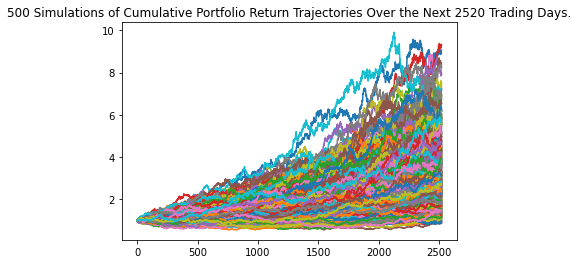

In [84]:
# Plot simulation outcomes
tenline_plot = tenMC_Retirement.plot_simulation()

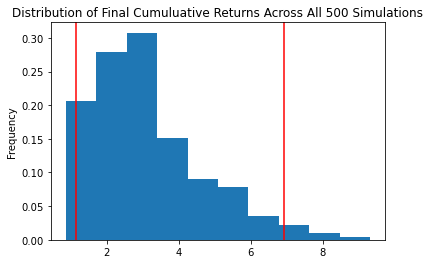

In [85]:
# Plot probability distribution and confidence intervals
tendist_plot = tenMC_Retirement.plot_distribution()

In [86]:
# Fetch summary statistics from the Monte Carlo simulation results
tenstats_tbl = tenMC_Retirement.summarize_cumulative_return()

# Print summary statistics
print(tenstats_tbl)

count           500.000000
mean              3.137776
std               1.536619
min               0.864218
25%               2.014995
50%               2.814857
75%               3.902319
max               9.315247
95% CI Lower      1.133757
95% CI Upper      6.928414
Name: 2520, dtype: float64


In [87]:
# Set initial investment
teninitial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
tenci_lower = round(tenstats_tbl[8]*teninitial_investment,2)
tenci_upper = round(tenstats_tbl[9]*teninitial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${teninitial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${tenci_lower} and ${tenci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $22675.13 and $138568.28
